In [1]:
import numpy as np
import pandas as pd

data=pd.read_csv('C:/Users/kusha/OneDrive/Desktop/Task/Year2009_2010/Year2009__2010.csv',encoding='unicode_escape')

In [2]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,12/9/2010 20:01,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,12/9/2010 20:01,3.75,17530.0,United Kingdom


In [3]:
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [4]:
data.head() 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


In [6]:
data.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [7]:
data=data.dropna(subset=['Customer ID'])

In [8]:
data.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [9]:
data.isnull().sum().sum()

0

In [10]:
data.duplicated().sum()

6771

In [11]:
data.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [14]:
data=data[(data['Quantity']>0) & (data['Price']>0)]
data.describe()

,Quantity,Price,Customer ID
count,407664.000000,407664.000000,407664.000000
mean,13.585585,3.294438,15368.592598
std,96.840747,34.757965,1679.762138
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13997.000000
50%,5.000000,1.950000,15321.000000
75%,12.000000,3.750000,16812.000000
max,19152.000000,10953.500000,18287.000000


In [15]:
data.shape

(407664, 8)

In [16]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'],format="%m/%d/%Y %H:%M")

In [21]:
def get_month(x):
    return dt.datetime(x.year,x.month,1)

data['InvoiceMonth']=data['InvoiceDate'].apply(get_month)
grouping=data.groupby('Customer ID')['InvoiceMonth']

In [26]:
data['CohortMonth']=grouping.transform('min')
data.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceMonth,CohortMonth
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,2010-12-01,2009-12-01
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-01,2009-12-01
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-01,2009-12-01
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-01,2009-12-01
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom,2010-12-01,2009-12-01


In [29]:
def get_month_int(dframe,column):
    year=dframe[column].dt.year
    month=dframe[column].dt.month
    day=dframe[column].dt.day
    return year,month,day


invoice_year,invoice_month,_=get_month_int(data,'InvoiceMonth')
cohort_year,cohort_month,_=get_month_int(data,'CohortMonth')

year_diff=invoice_year-cohort_year
month_diff=invoice_month-cohort_month
data['CohortIndex']=year_diff*12+month_diff+1

In [31]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,2009-12-01,1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,2009-12-01,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,2009-12-01,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01,2009-12-01,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01,2009-12-01,1


In [33]:
# count monthly active customers from each cohort
grouping=data.groupby(['CohortMonth','CohortIndex'])
cohort_data=grouping['Customer ID'].apply(pd.Series.nunique)

In [34]:
cohort_data

CohortMonth  CohortIndex
2009-12-01   1              955
             2              337
             3              319
             4              406
             5              363
                           ... 
2010-10-01   2               97
             3               35
2010-11-01   1              325
             2               35
2010-12-01   1               46
Name: Customer ID, Length: 91, dtype: int64

In [35]:
cohort_data=cohort_data.reset_index()

In [36]:
cohort_data

,CohortMonth,CohortIndex,Customer ID
0,2009-12-01,1,955
1,2009-12-01,2,337
2,2009-12-01,3,319
3,2009-12-01,4,406
4,2009-12-01,5,363
...,...,...,...
86,2010-10-01,2,97
87,2010-10-01,3,35
88,2010-11-01,1,325
89,2010-11-01,2,35


In [37]:
cohort_counts=cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='Customer ID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2009-12-01,955.0,337.0,319.0,406.0,363.0,343.0,360.0,327.0,321.0,346.0,403.0,473.0,237.0
2010-01-01,383.0,79.0,119.0,117.0,101.0,115.0,99.0,88.0,107.0,122.0,116.0,38.0,NaN
2010-02-01,374.0,89.0,84.0,109.0,92.0,75.0,72.0,107.0,95.0,103.0,27.0,NaN,NaN
2010-03-01,443.0,84.0,102.0,107.0,103.0,90.0,109.0,134.0,122.0,35.0,NaN,NaN,NaN
2010-04-01,294.0,57.0,57.0,48.0,54.0,66.0,81.0,77.0,20.0,NaN,NaN,NaN,NaN
2010-05-01,254.0,40.0,43.0,44.0,45.0,65.0,54.0,20.0,NaN,NaN,NaN,NaN,NaN
2010-06-01,270.0,47.0,51.0,55.0,62.0,77.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,186.0,29.0,34.0,55.0,54.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,162.0,33.0,48.0,52.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# retention rate table
cohort_size=cohort_counts.iloc[:,0]
retention=cohort_counts.divide(cohort_size,axis=0)
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2009-12-01,100.0,35.3,33.4,42.5,38.0,35.9,37.7,34.2,33.6,36.2,42.2,49.5,24.8
2010-01-01,100.0,20.6,31.1,30.5,26.4,30.0,25.8,23.0,27.9,31.9,30.3,9.9,NaN
2010-02-01,100.0,23.8,22.5,29.1,24.6,20.1,19.3,28.6,25.4,27.5,7.2,NaN,NaN
2010-03-01,100.0,19.0,23.0,24.2,23.3,20.3,24.6,30.2,27.5,7.9,NaN,NaN,NaN
2010-04-01,100.0,19.4,19.4,16.3,18.4,22.4,27.6,26.2,6.8,NaN,NaN,NaN,NaN
2010-05-01,100.0,15.7,16.9,17.3,17.7,25.6,21.3,7.9,NaN,NaN,NaN,NaN,NaN
2010-06-01,100.0,17.4,18.9,20.4,23.0,28.5,6.7,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,100.0,15.6,18.3,29.6,29.0,10.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,100.0,20.4,29.6,32.1,11.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


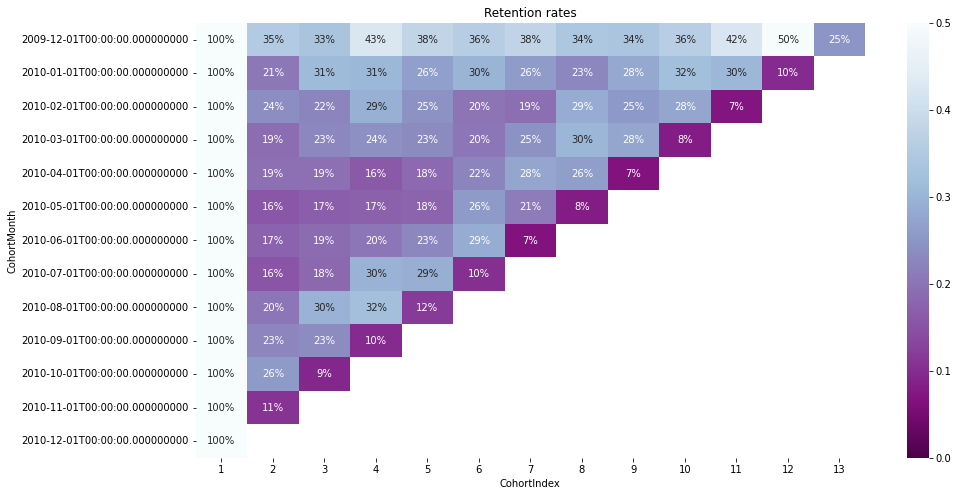

In [42]:
plt.figure(figsize=(15,8))
plt.title('Retention rates')
sns.heatmap(data=retention,annot=True,fmt='.0%',vmin=0.0,vmax=0.5,cmap='BuPu_r')
plt.show()

In [62]:
# average quantity for each cohort

grouping=data.groupby(['CohortMonth','CohortIndex'])
cohort_data=grouping['Quantity'].mean()
cohort_data=cohort_data.reset_index()

average_quantity=cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='Quantity')
average_quantity.round(1)
average_quantity.index=average_quantity.index.date


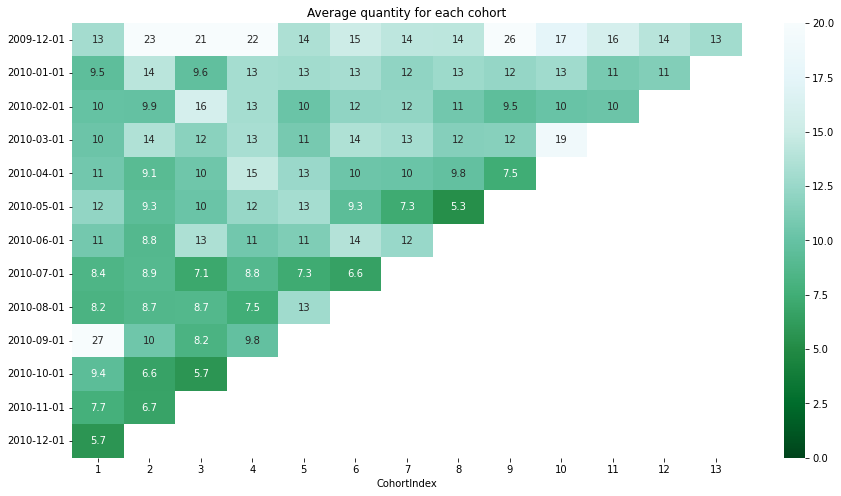

In [63]:
plt.figure(figsize=(15,8))
plt.title('Average quantity for each cohort')
sns.heatmap(data=average_quantity,annot=True,vmin=0.0,vmax=20,cmap='BuGn_r')
plt.show()

In [64]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,2009-12-01,1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,2009-12-01,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,2009-12-01,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01,2009-12-01,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01,2009-12-01,1
...,...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,2010-12-01,2009-12-01,13
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-01,2009-12-01,13
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-01,2009-12-01,13
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,2010-12-01,2009-12-01,13


In [66]:
data['TotalSum']=data['Price']*data['Quantity']

In [67]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceMonth,CohortMonth,CohortIndex,TotalSum
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01,2009-12-01,1,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,2009-12-01,1,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01,2009-12-01,1,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01,2009-12-01,1,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01,2009-12-01,1,30.0


In [68]:
print(data.InvoiceDate.dt.date.min(),data.InvoiceDate.dt.date.max())

2009-12-01 2010-12-09


In [69]:
snapshot_date=data['InvoiceDate'].max()+dt.timedelta(days=1)

In [70]:
snapshot_date

Timestamp('2010-12-10 20:01:00')

In [77]:
rfm=data.groupby(['Customer ID']).agg({'InvoiceDate': lambda x: (snapshot_date-x.max()).days, 'Invoice': 'count', 'TotalSum': 'sum'})

In [78]:
rfm

,InvoiceDate,Invoice,TotalSum
Customer ID,,,
12346.0,165,33,372.86
12347.0,3,71,1323.32
12348.0,74,20,222.16
12349.0,43,102,2671.14
12351.0,11,21,300.93
...,...,...,...
18283.0,18,230,641.77
18284.0,67,28,461.68
18285.0,296,12,427.00


In [84]:
rfm=rfm.rename(columns={'InvoiceDate':'Recency','Invoice':'Frequency','TotalSum':'MonetaryValue'})

In [85]:
rfm

,Recency,Frequency,MonetaryValue
Customer ID,,,
12346.0,165,33,372.86
12347.0,3,71,1323.32
12348.0,74,20,222.16
12349.0,43,102,2671.14
12351.0,11,21,300.93
...,...,...,...
18283.0,18,230,641.77
18284.0,67,28,461.68
18285.0,296,12,427.00


In [86]:
# building rfm segments

r_labels=range(4,0,-1)
f_labels=range(1,5)
m_labels=range(1,5)


r_quartiles=pd.qcut(rfm['Recency'],q=4,labels=r_labels)
f_quartiles=pd.qcut(rfm['Frequency'],q=4,labels=f_labels)
m_quartiles=pd.qcut(rfm['MonetaryValue'],q=4,labels=m_labels)

rfm=rfm.assign(R=r_quartiles,F=f_quartiles,M=m_quartiles)


In [89]:
rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment
Customer ID,,,,,,,
12346.0,165,33,372.86,1,2,2,1.02.02.0
12347.0,3,71,1323.32,4,3,3,4.03.03.0
12348.0,74,20,222.16,2,2,1,2.02.01.0
12349.0,43,102,2671.14,3,3,4,3.03.04.0
12351.0,11,21,300.93,4,2,1,4.02.01.0
...,...,...,...,...,...,...,...
18283.0,18,230,641.77,4,4,2,4.04.02.0
18284.0,67,28,461.68,2,2,2,2.02.02.0
18285.0,296,12,427.00,1,1,2,1.01.02.0


In [90]:
def add_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])

rfm['RFM_Segment']=rfm.apply(add_rfm,axis=1)
rfm['RFM_Score']=rfm[['R','F','M']].sum(axis=1)



In [93]:
rfm.groupby(['RFM_Segment']).size().sort_values(ascending=False)

RFM_Segment
444    406
111    384
344    223
211    175
122    169
      ... 
314      9
142      9
114      8
414      5
241      1
Length: 61, dtype: int64

In [94]:
rfm[rfm['RFM_Segment']=='111'].head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
Customer ID,,,,,,,,
12362.0,374,1,130.00,1,1,1,111,3
12392.0,227,7,234.75,1,1,1,111,3
12404.0,318,1,63.24,1,1,1,111,3
12416.0,292,11,202.56,1,1,1,111,3
12466.0,318,1,56.73,1,1,1,111,3


In [95]:
#summary metrics per RFM Score

rfm.groupby('RFM_Score').agg({'Recency':'mean','Frequency':'mean','MonetaryValue':['mean','count']}).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3           252.9       8.2         156.7   384
4           177.4      15.8         235.7   391
5           145.6      21.6         363.3   453
6            92.9      27.5         597.0   469
7            84.3      41.2         827.9   496
8            61.1      59.2        1184.0   447
9            46.5      84.0        1591.6   440
10           37.5     134.0        2421.4   416
11           21.6     203.1        3714.0   410
12            7.7     376.3       10012.0   406

In [96]:
# using RFM score to group cuustomers intp Gold, Silver and Bronze segments
def segments(df):
    if df['RFM_Score']>9:
        return 'Gold'
    elif (df['RFM_Score']>5) and (df['RFM_Score']<=9):
        return 'Silver'
    
    else :
        return 'Bronze'
    
rfm['General_Segment']=rfm.apply(segments,axis=1)


In [97]:
rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment
Customer ID,,,,,,,,,
12346.0,165,33,372.86,1,2,2,122,5,Bronze
12347.0,3,71,1323.32,4,3,3,433,10,Gold
12348.0,74,20,222.16,2,2,1,221,5,Bronze
12349.0,43,102,2671.14,3,3,4,334,10,Gold
12351.0,11,21,300.93,4,2,1,421,7,Silver
...,...,...,...,...,...,...,...,...,...
18283.0,18,230,641.77,4,4,2,442,10,Gold
18284.0,67,28,461.68,2,2,2,222,6,Silver
18285.0,296,12,427.00,1,1,2,112,4,Bronze


In [98]:
rfm.groupby(['General_Segment']).agg({'Recency':'mean','Frequency':'mean','MonetaryValue':['mean','count']}).round(1)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Bronze            189.3      15.6         258.1  1228
Gold               22.4     236.8        5353.0  1232
Silver             71.9      52.2        1036.8  1852

In [99]:
# data pre-processsing for Kmeans Clustering

In [100]:
rfm_clustering=rfm[['Recency','Frequency','MonetaryValue']]

In [101]:
print(rfm_clustering.describe())

           Recency    Frequency  MonetaryValue
count  4312.000000  4312.000000    4312.000000
mean     91.171846    94.541744    2048.238236
std      96.860633   202.046410    8914.481280
min       1.000000     1.000000       2.950000
25%      18.000000    18.000000     307.987500
50%      53.000000    44.000000     706.020000
75%     136.000000   102.000000    1723.142500
max     374.000000  5570.000000  349164.350000


C:\Users\kusha\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kusha\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kusha\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

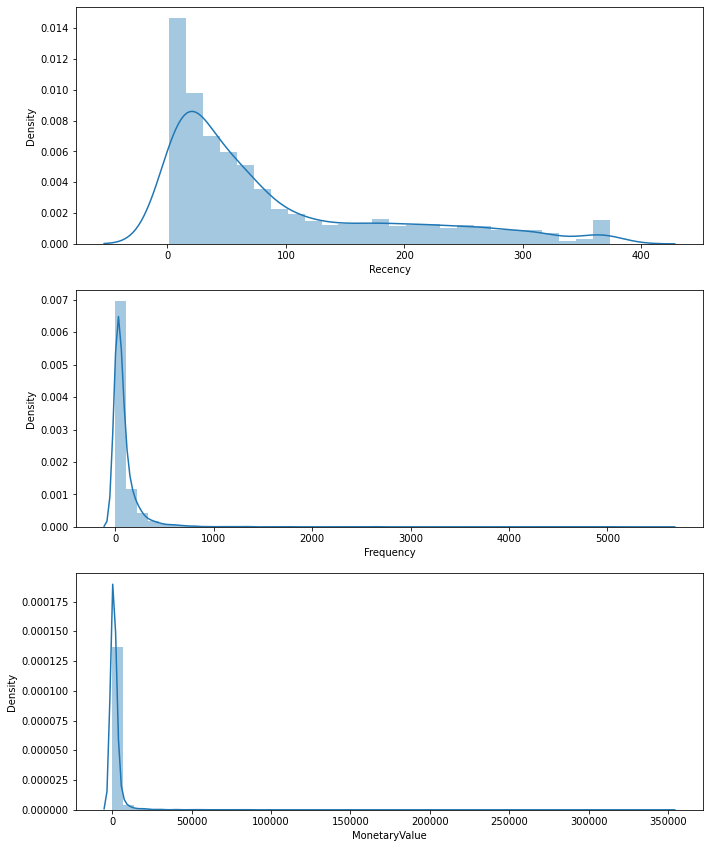

In [107]:
f,ax=plt.subplots(figsize=(10,12))
plt.subplot(3,1,1)
sns.distplot(rfm_clustering.Recency,label='Recency')
plt.subplot(3,1,2)
sns.distplot(rfm_clustering.Frequency,label='Frequency')
plt.subplot(3,1,3)
sns.distplot(rfm_clustering.MonetaryValue,label='Monetary Value')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()